## Business Case:- Sales Prediction using Python

***Task:-***

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading of the data

In [2]:
data=pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Domain Analysis

- TV : Amount spend on TV advertisement.
- Radio : Amount spend on Radio advertisement.
- Newspaper : Amount spend on newspaper advertisement.
- Sales : Sales of the product.

### Basic Checks

In [3]:
# drop the unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# display first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#display last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
# chack the rows and columns in dataset
data.shape

(200, 4)

In [7]:
# print names of the columns
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
# datatypes of columns
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
# info of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
#statistical summary of nuemrical column
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Insights:

1) maximum sales are done through TV minimun sales are done through Radio.
2) In one case the company has spent 0 dollers for advertising on Radio.
3) The cost of advertisement on radio is less while on TV is high.

### Exploratory Data Analysis

### Univariate analysis

<Figure size 200x300 with 0 Axes>

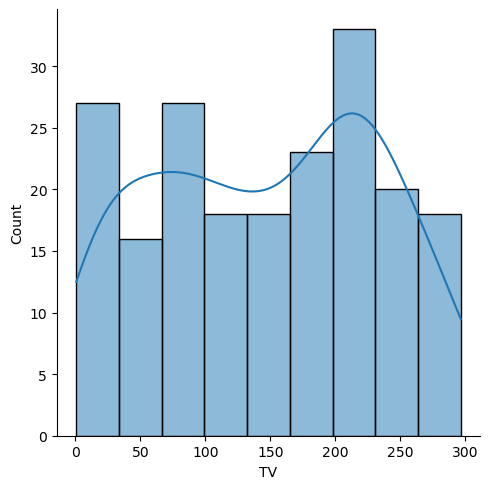

In [11]:
# Analysing TV
plt.figure(figsize=(2,3),facecolor='white')
sns.displot(x=data.TV,kde=True)
plt.show()

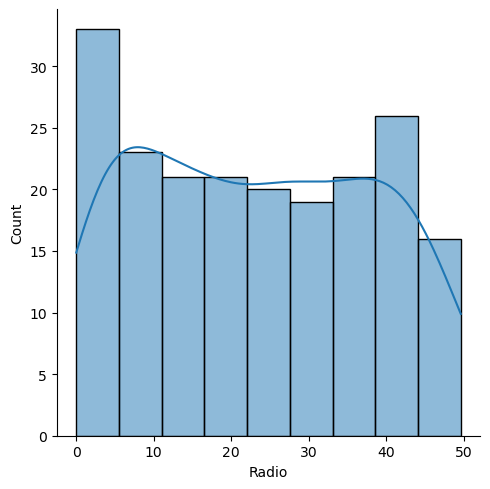

In [12]:
#Analyze Radio
sns.displot(x=data.Radio,kde=True)

<Axes: xlabel='Newspaper', ylabel='Count'>

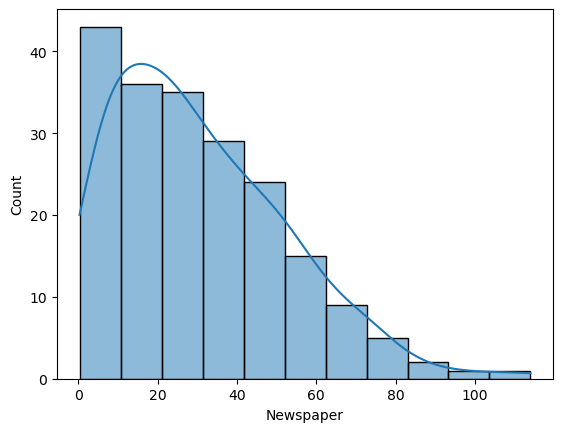

In [13]:
# analyze newspaper
sns.histplot(x=data.Newspaper,kde=True)

<Axes: xlabel='Sales', ylabel='Count'>

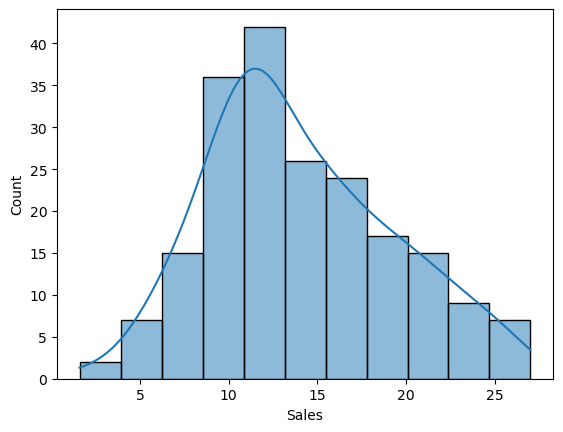

In [14]:
sns.histplot(x=data.Sales,kde=True)

## Insights:

1) Sales column is representing normal distribution.
2) TV,Radio,Newspaper are not normally distributed/skewness

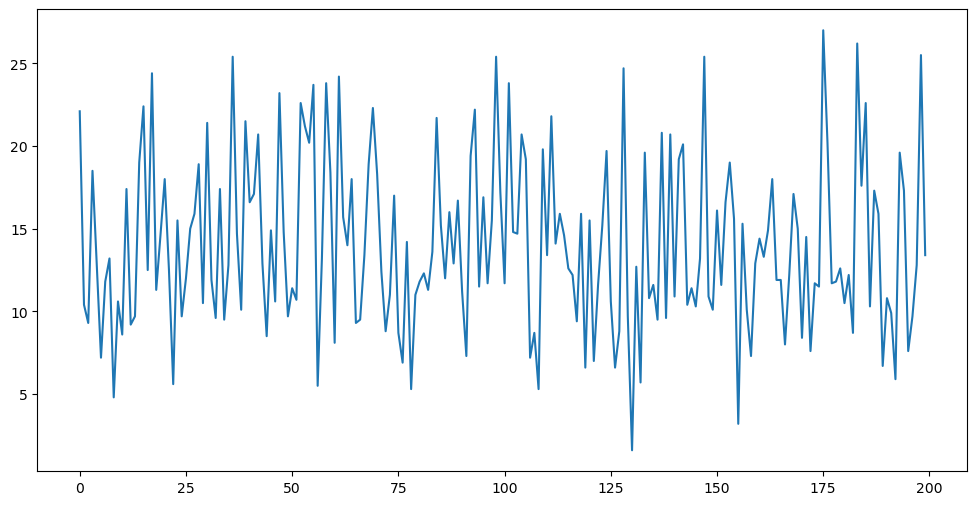

In [17]:
plt.figure(figsize=(12,6))
plt.plot(data['Sales'])

### Bivariate analysis


<Axes: xlabel='TV', ylabel='Sales'>

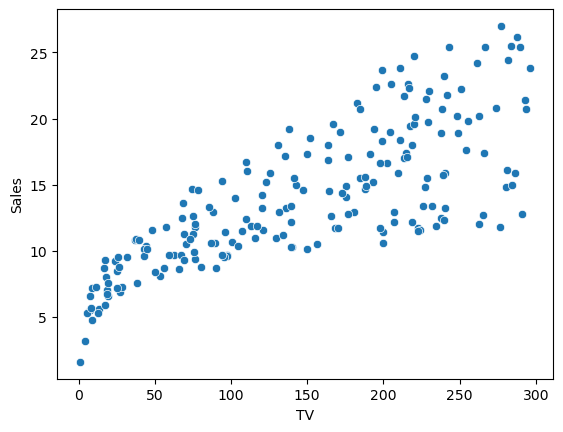

In [15]:
## Analyzing TV with Sales column
sns.scatterplot(x='TV',y='Sales',data=data)

### Insights:
- There is high correaltion between TV and Sales.
- As we increase the amount of money spent on TV sale is also increasing.
- There is positive relationship between TV and Sales.

<Axes: xlabel='Radio', ylabel='Sales'>

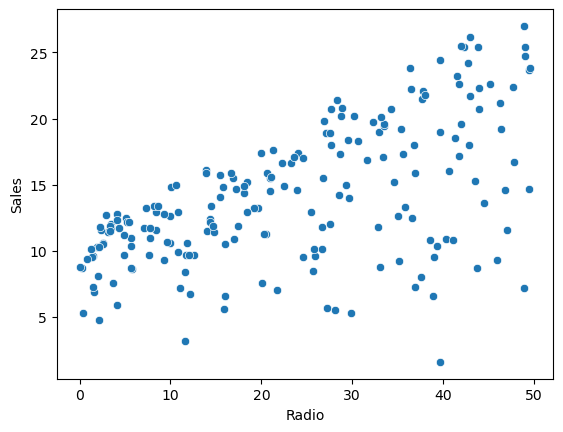

In [16]:
# Analysing Radio and Sales
sns.scatterplot(x='Radio',y='Sales',data=data)

### Insights:

- Radio advertisement are not showing much trend or strong relationship between sales of the product.
- Investing in Radio advertising will have less impact on sales.

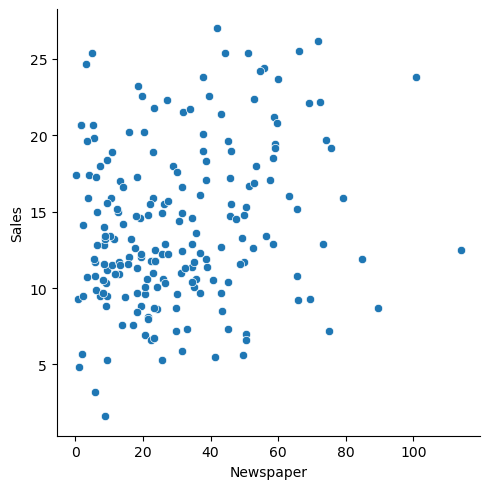

In [17]:
# Analysing Newspaper and Sales
sns.relplot(x='Newspaper',y='Sales',data=data)

### Insights:

- There is no relationship between Newspaper and Sales.
- Investing more or less on newspaper will yield very less sale.

#### Overall Insights

- Television is the best field for advertising so that company can yield more sales.
- Investing in Radio will also yield some good sales but investing in newspaper in not really good idea.


### Multivariate analysis


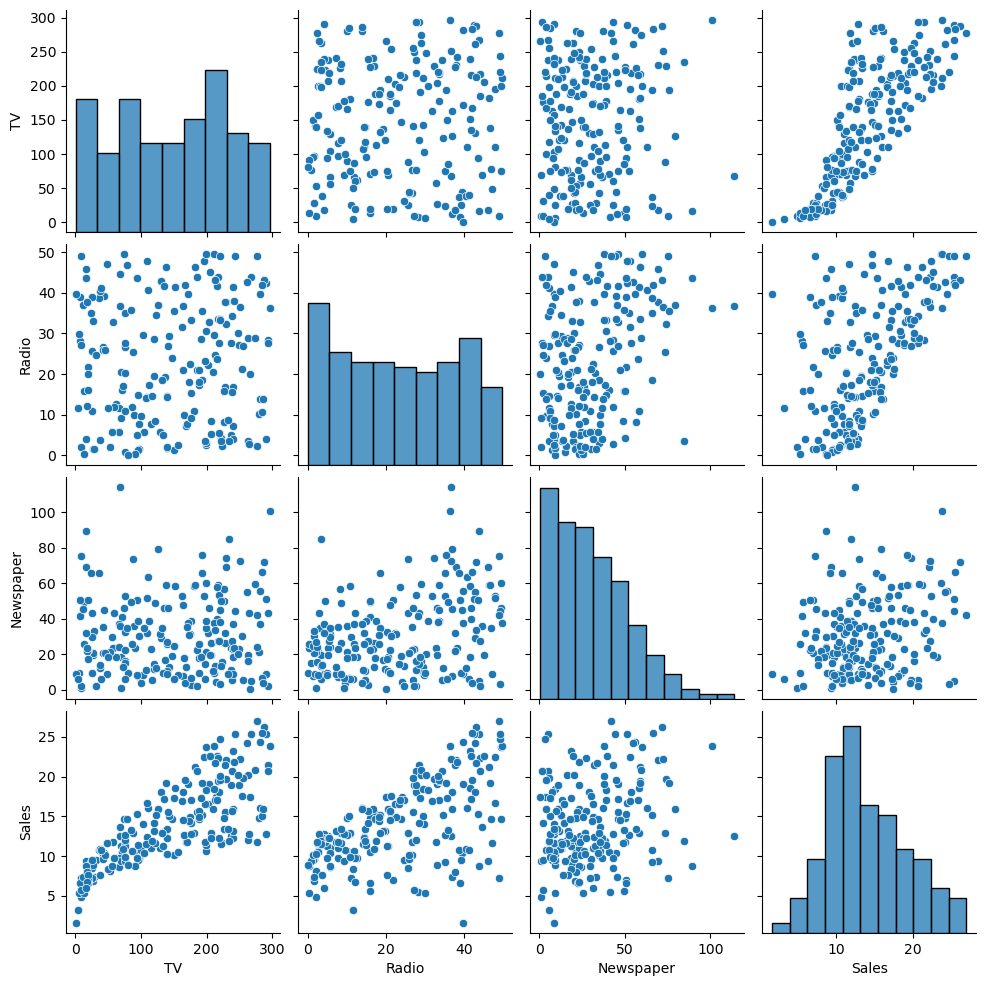

In [18]:
sns.pairplot(data)

### Data Preprocessing

In [19]:
# finding missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [20]:
# check for duplicates
data.duplicated().sum()

0

## Check the outliers

<Axes: xlabel='TV'>

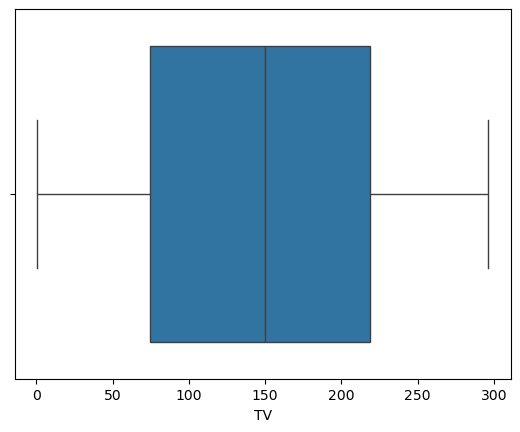

In [21]:
# Check for outliers in TV column
sns.boxplot(x='TV',data=data)

<Axes: xlabel='Radio'>

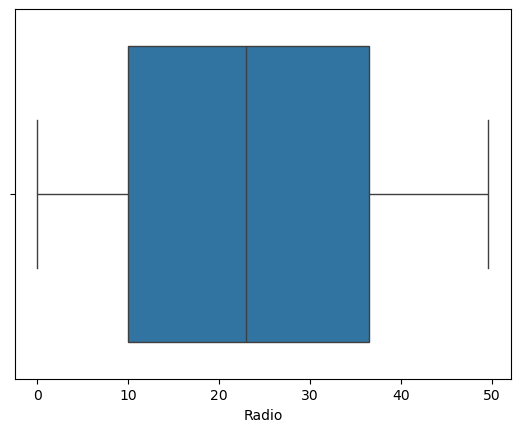

In [22]:
# outliers in Radio column
sns.boxplot(x=data.Radio)

<Axes: xlabel='Newspaper'>

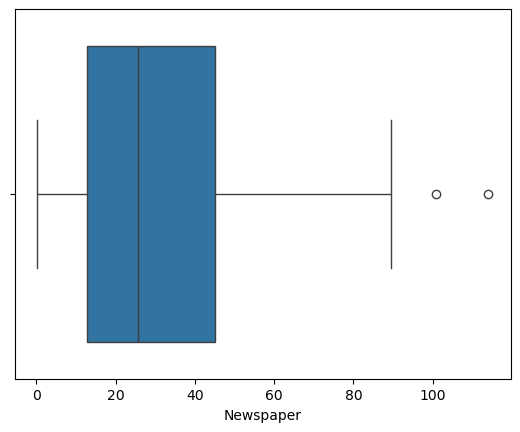

In [23]:
# outliers in newspaper
sns.boxplot(x=data.Newspaper)

<Axes: xlabel='Sales'>

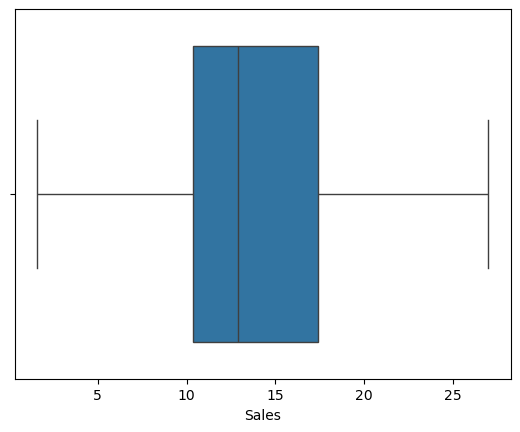

In [24]:
# outlier in Sales
sns.boxplot(x=data.Sales)

- We have outliers in the newspaper columns.
- Outliers in newspaper are seen towards right side of the boxplot.

In [27]:
# find Q1 and Q3
Q1=data['Newspaper'].quantile(0.25)
print(f'Upper quantile:{Q1}')
Q3=data['Newspaper'].quantile(0.75)
print(f'Upper quantile:{Q3}')

Upper quantile:12.75
Upper quantile:45.1


In [28]:
# calculate IQR
IQR=Q3-Q1
IQR

32.35

In [29]:
#find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('Lower limit: ',lower_limit)
upper_limit=Q3+1.5*IQR
print('Upper limit: ',upper_limit)

Lower limit:  -35.775000000000006
Upper limit:  93.625


In [30]:
# Find the records which has values greter than upper limit and
#less than lower limit
data.loc[data['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [31]:
data.loc[101]

TV           296.4
Radio         36.3
Newspaper    100.9
Sales         23.8
Name: 101, dtype: float64

In [32]:
data.loc[data['Newspaper']<lower_limit]

,TV,Radio,Newspaper,Sales


In [33]:
len(data)

200

In [34]:
2/200*100

1.0

In [35]:
# Checking the percentage of outlier in the dataset
len(data.loc[data['Newspaper']>upper_limit]) / len(data) *100
# 2 /200 * 100

1.0

In [36]:
#imputing  the outliers using median
data.loc[data['Newspaper']>upper_limit,'Newspaper']=data['Newspaper'].median()

In [37]:
data.loc[data['Newspaper']==25.75]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,25.75,12.5
101,296.4,36.3,25.75,23.8


In [38]:
data['Newspaper'].median()

25.675

In [39]:
data.loc[101]

TV           296.40
Radio         36.30
Newspaper     25.75
Sales         23.80
Name: 101, dtype: float64

<Axes: xlabel='Newspaper'>

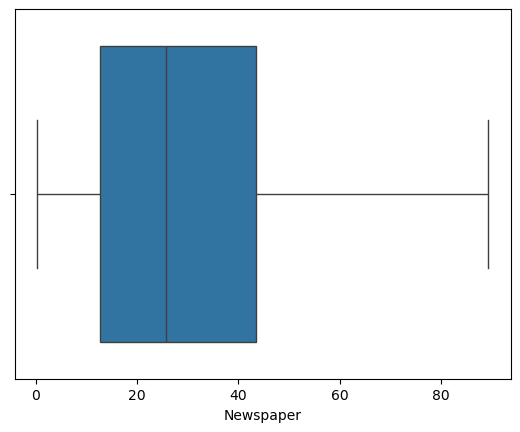

In [40]:
# check is there any outliers in nespaper column
sns.boxplot(x=data['Newspaper'])

In [41]:
data.loc[data['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales


In [42]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [43]:
# Scaling the continiuos variable

In [ ]:
# Transformation

In [ ]:
# balancing of the target variable

### Feature Selection

In [44]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


<Axes: >

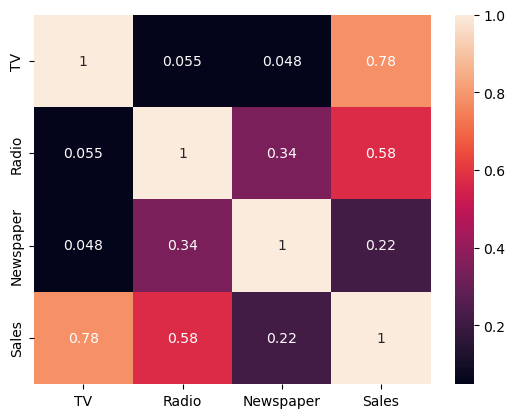

In [45]:
# Checking the correlation 
sns.heatmap(data.corr(),annot=True)

####  There is no corrlation between input and output variable so we will not drop any column

#### Splitting the data into independent(x) and dependent(y) variable

In [46]:
X=data[['TV','Radio','Newspaper']]
y=data.Sales

In [47]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [48]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [49]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split    #### x_train=80% , y_test=20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                               random_state=4)

In [ ]:
X_train.head()

In [52]:
y_test.shape

(40,)

# Model Building

## Model 1:- Linear Regreession

In [53]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression() # object creation
LR.fit(X_train,y_train) # training of model

LinearRegression()

In [55]:
# make prediction
y_predict = LR.predict(X_test)
y_predict

array([17.28439337, 16.74723281, 21.99067161, 24.59641293, 12.11594768,
       21.0260405 , 10.16015242, 12.34000166, 11.69160518, 17.02632765,
       22.77043848, 15.35179255,  8.48390554, 14.92362495, 18.61652075,
       18.79305147, 18.93241403, 14.40578745,  9.66309965, 20.60811746,
       14.90819896, 17.84821764, 23.05202208,  7.74831821, 21.56515812,
       19.44643919, 13.94689181, 11.56252064, 18.37586461, 12.20450682,
       11.35364572,  9.91712851, 13.57421226, 15.1818094 , 18.06495284,
        6.80822383, 14.13713702, 14.14878696, 14.15210507, 10.69630799])

In [56]:
# actual values
y_test.head()

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
Name: Sales, dtype: float64

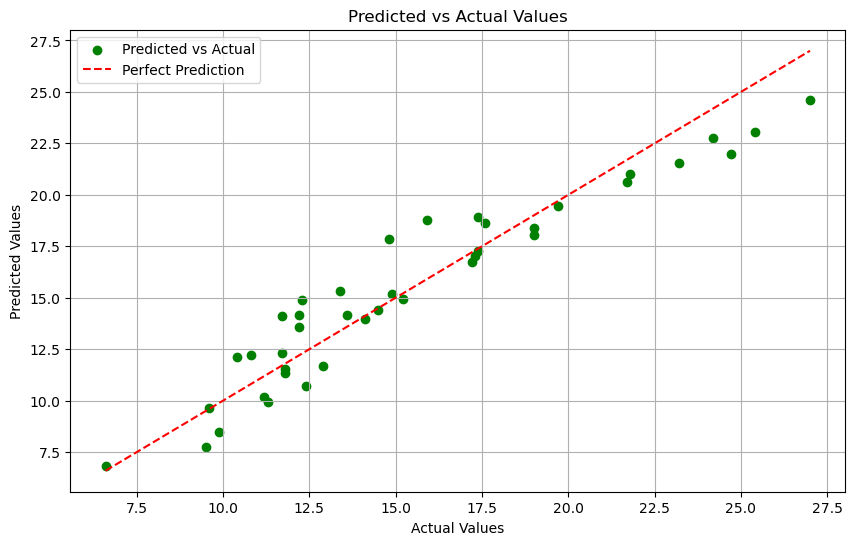

In [72]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [57]:
LR.coef_   ## coefficients /slope   #### m is mean coef_

array([ 4.63550912e-02,  1.77867448e-01, -4.40675344e-06])

In [58]:
LR.intercept_  ## constaent     #### c is intercenpt_

3.0631541571019145

What will be the total sales if my investment on TV=1000,Radio=300,Newspaper=50

In [59]:
LR.predict([[1000,300,2000]])

array([102.76966632])

In [60]:
LR.predict([[100,50,10]])

array([16.59199162])

In [61]:
LR.predict([[10,500,10]])

array([92.46038506])

In [62]:
LR.predict([[5,10,100]])

array([5.07316342])

#### Evaluation of model

In [63]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [64]:
# MSE
MSE=mean_squared_error(y_test,y_predict)     ## mean squared error
MSE

2.21506880663839

In [65]:
#MAE
MAE=mean_absolute_error(y_test,y_predict)
MAE

1.2108016418776077

In [66]:
#RMSE
rmse=np.sqrt(MSE)
rmse

1.4883107224764558

In [67]:
r2score=r2_score(y_test,y_predict)

In [68]:
r2score

0.9086633358695456

In [69]:
X_test.shape

(40, 3)

In [70]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.90)*(40-1)/(40-3-1)
adjusted_r2

0.8916666666666667

## Model 2:- Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [76]:
r2_score(y_test,dt_pred)

0.9584152756340988

In [84]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.95)*(40-1)/(40-3-1)
adjusted_r2

0.9458333333333333

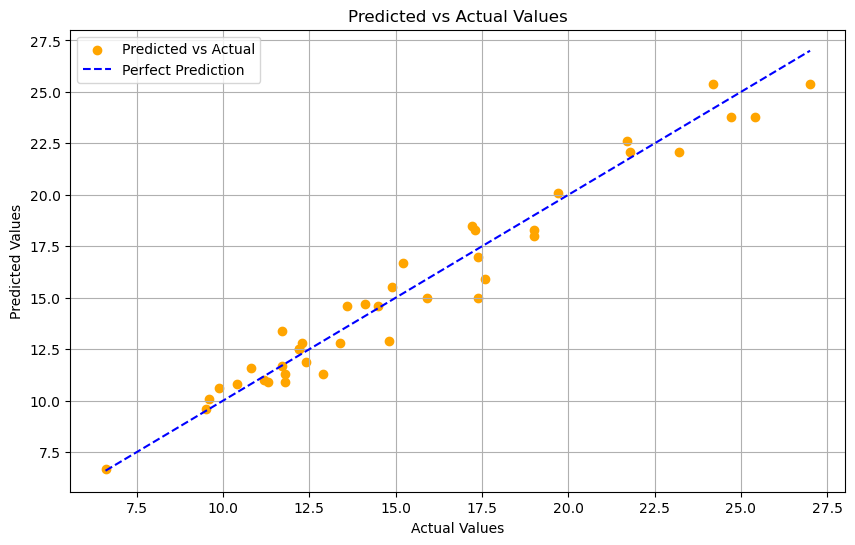

In [79]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_pred, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [92]:
## check cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt,X,y,cv=3,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.95230028 0.95192273 0.93701701]
Cross validation Score: 0.9470800097086697
Std : 0.007117283261353421


## Model 3:- Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [86]:
r2_score(y_test,rf_pred)

0.9754083475097488

In [87]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.97)*(40-1)/(40-3-1)
adjusted_r2

0.9675

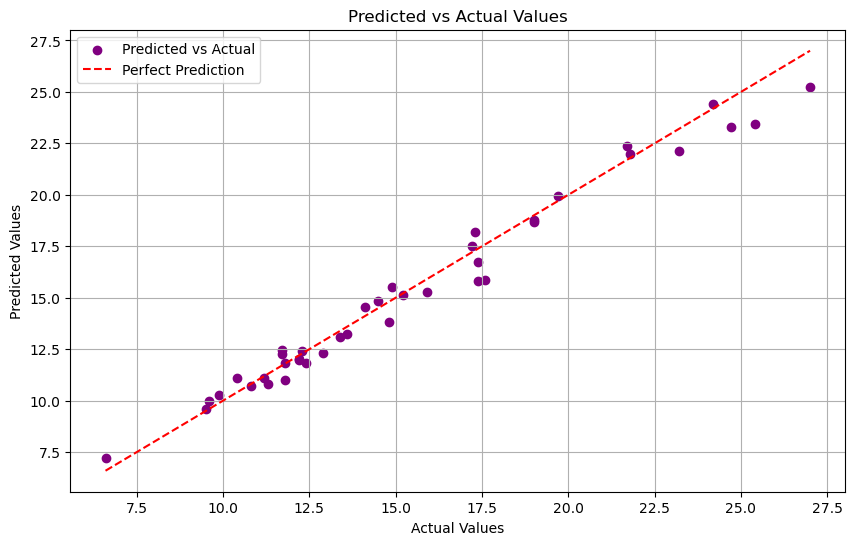

In [90]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

In [91]:
## check cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X,y,cv=3,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.97965212 0.97118147 0.97411019]
Cross validation Score: 0.974981258905398
Std : 0.0035125521930875173


## Model 4 :- Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
gr_pred = gr.predict(X_test)


In [95]:
r2_score(y_test,gr_pred)

0.9795431379419091

In [97]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.98)*(40-1)/(40-3-1)
adjusted_r2

0.9783333333333333

In [99]:
## check cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gr,X,y,cv=3,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.98459323 0.96853502 0.97948228]
Cross validation Score: 0.9775368433878836
Std : 0.0066985095741260384


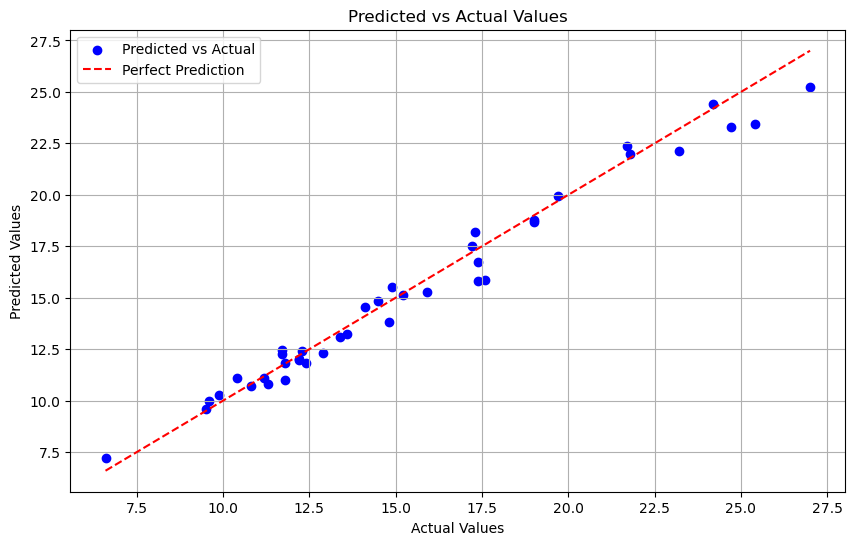

In [100]:
# Create a scatter plot to visualaze the relationship between my predicted values and actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='Blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

## Model Comparison

In [104]:
df = pd.DataFrame()
df['Model']=['Linear Regression','Decision Tree','Random Forest','Gradient Boosting Regressor']
df['r2_score'] = [90,95,97,98]
df['adjected_r2'] = [89,94,96,97]

In [105]:
df

,Model,r2_score,adjected_r2
0,Linear Regression,90,89
1,Decision Tree,95,94
2,Random Forest,97,96
3,Gradient Boosting Regressor,98,97


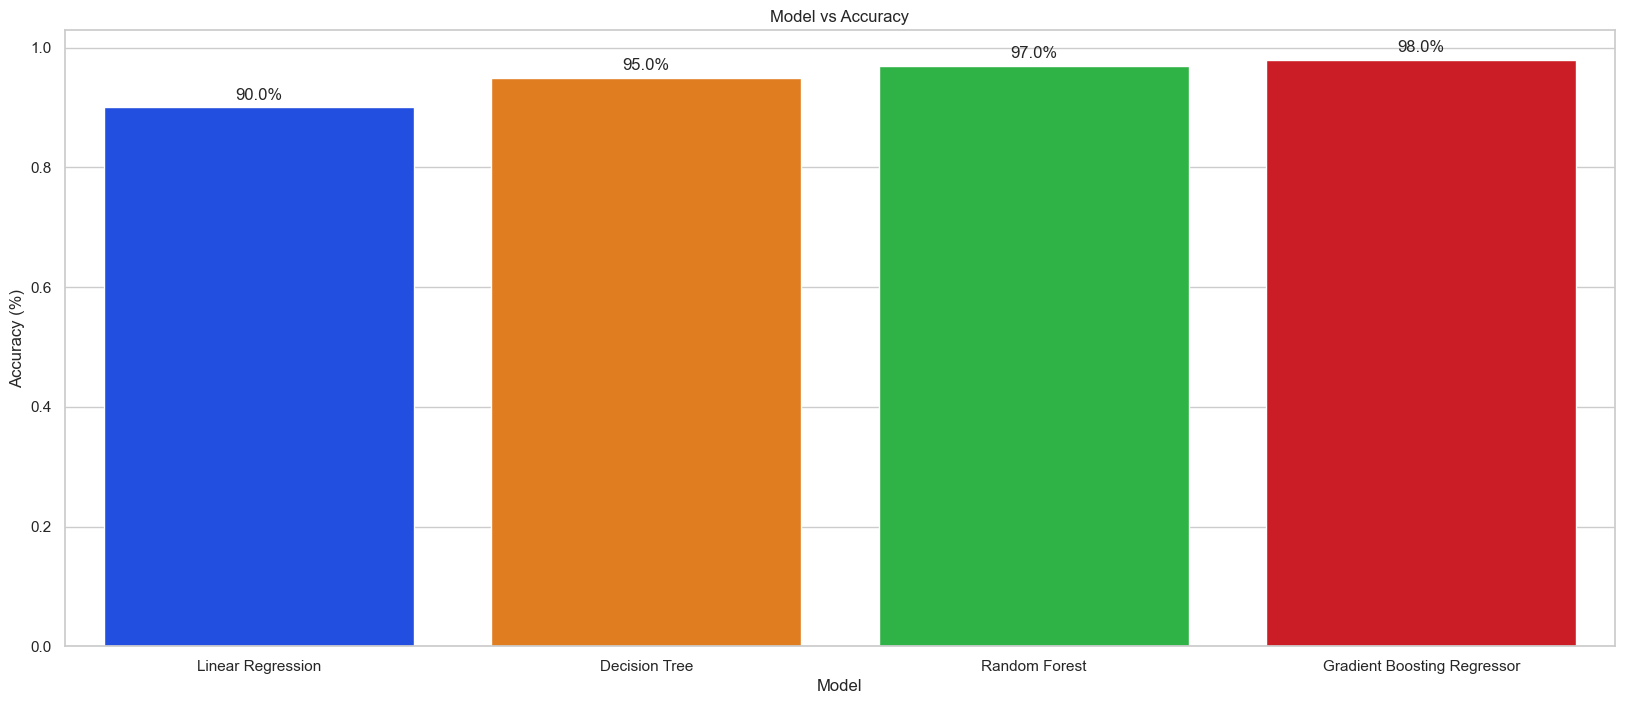

In [108]:
## Visualization 

df = pd.DataFrame()
df['Model']=['Linear Regression','Decision Tree','Random Forest','Gradient Boosting Regressor']
df['r2_score'] = [0.90,0.95,0.97,0.98]



# Create the plot
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')

# Barplot
bar_plot = sns.barplot(x='Model', y='r2_score', data=df, palette='bright')

# Add text annotations
for p in bar_plot.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)  # Convert to percentage
    bar_plot.annotate(percentage, 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9),  # 9 points vertical offset
                      textcoords='offset points')

# Add titles and labels
plt.title('Model vs Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.show()


## Summary:- 

The **Advertising dataset** is a widely used dataset in regression analysis to understand the impact of advertising budgets on sales.  

### **Features and Description**  
- **TV, Radio, Newspaper**: Advertising budgets (in thousands of dollars) allocated across these three mediums.  
- **Sales**: Target variable representing the units sold.  

### **Model Performance Summary**  
Based on regression models applied to the dataset, the following insights were noted regarding their performance (measured by R² score):  
1. **Linear Regression**: R² score of **90%**, indicating a good but baseline fit.  
2. **Decision Tree**: Improved performance with an R² score of **95%**.  
3. **Random Forest**: A robust model with an R² score of **97%**.  
4. **Gradient Boosting Regressor**: Best performer with an R² score of **98%**.

### **Key Insights**  
1. **Purpose**: The dataset is commonly used to understand the relationship between advertising budgets and sales, and to determine which medium contributes the most to sales performance.  
2. **Data Type**: It is numerical and structured, making it suitable for regression and correlation analysis.  
3. **Usage**: Ideal for studying multiple linear regression, simple regression, and feature significance.   

### **Applications**  
The dataset and these model evaluations provide valuable insights for businesses to optimize their advertising strategies by determining the most effective advertising channel for driving sales. Additionally, it serves as a great resource for beginners to practice regression techniques and compare different model performances.  

